In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape,LeakyReLU as LR, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab, or Jupyter
import numpy as np

In [4]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/Users/varshitanukala/Downloads/mnist.npz')
x_train = x_train / 255.0
x_test = x_test / 255.0
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

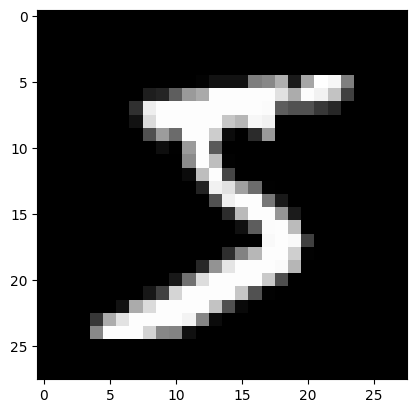

In [5]:
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [6]:
LATENT_SIZE = 32

In [7]:
#Creating the Encoder
encoder = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Define decoder model
decoder = Sequential([
    Dense(64, input_shape=(LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Build autoencoder model
img = Input(shape=(28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs=img, outputs=output)

In [10]:
# Compile the model
model.compile(optimizer="nadam", loss="binary_crossentropy")
EPOCHS = 60

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


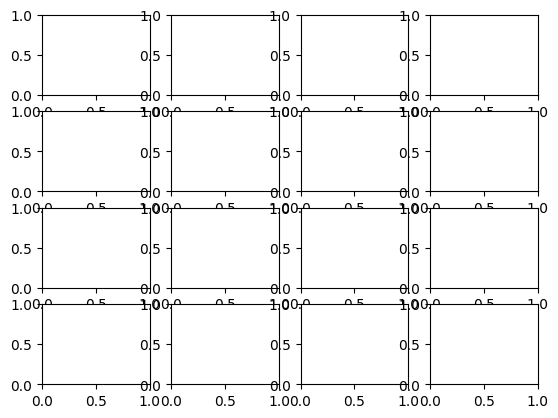

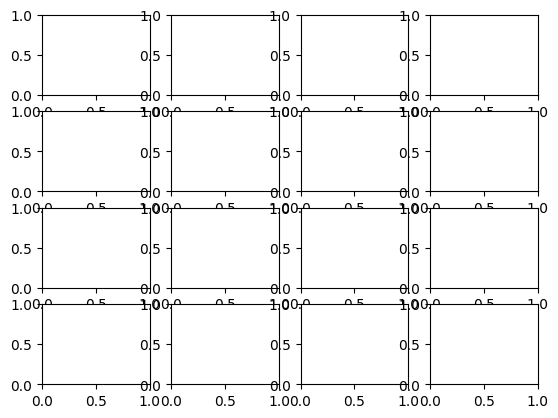

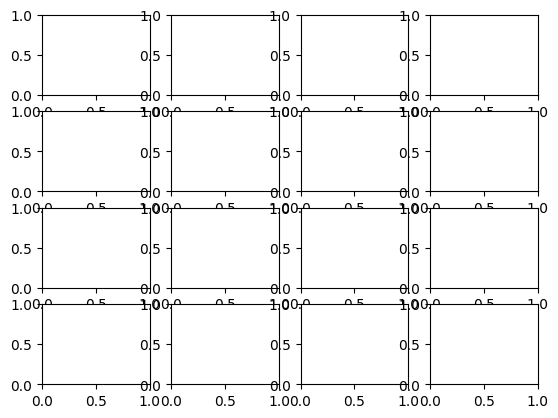

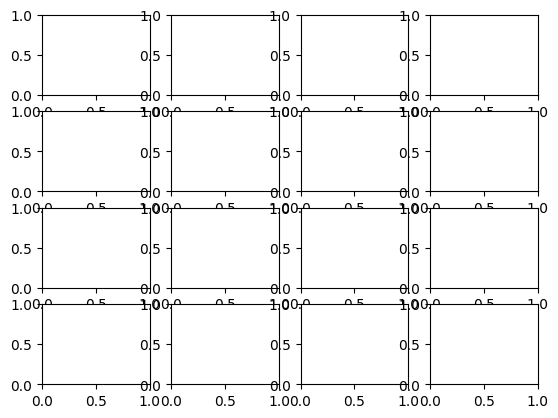

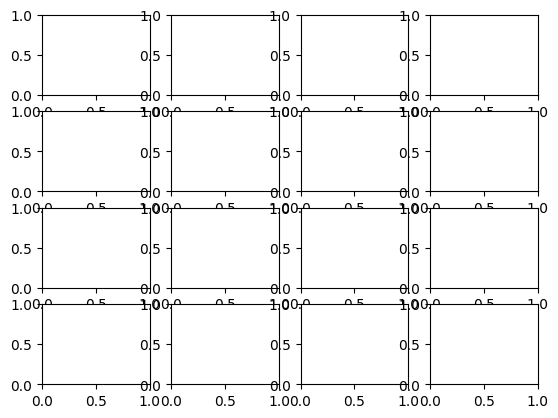

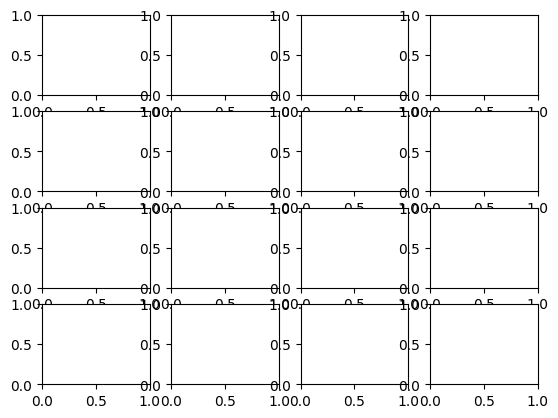

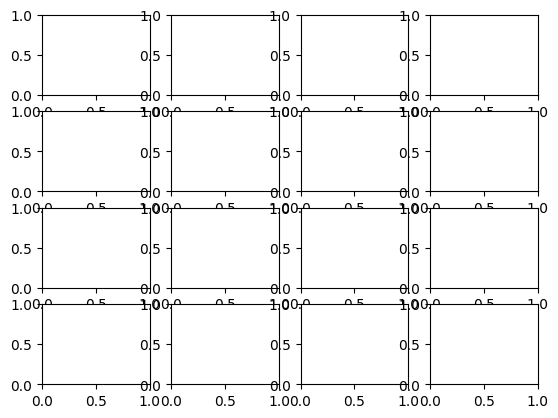

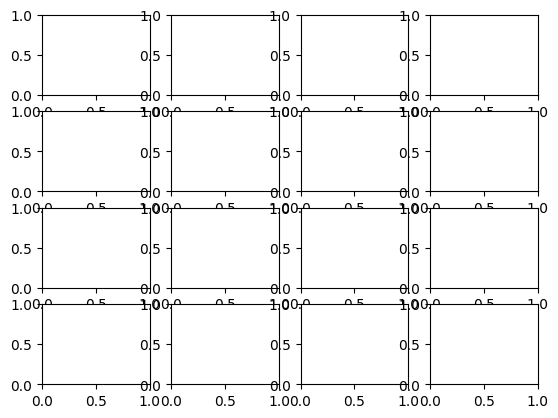

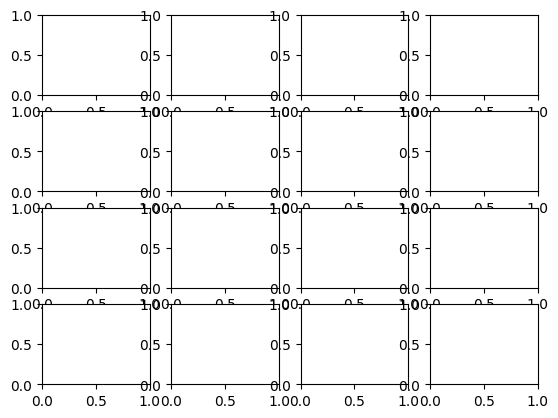

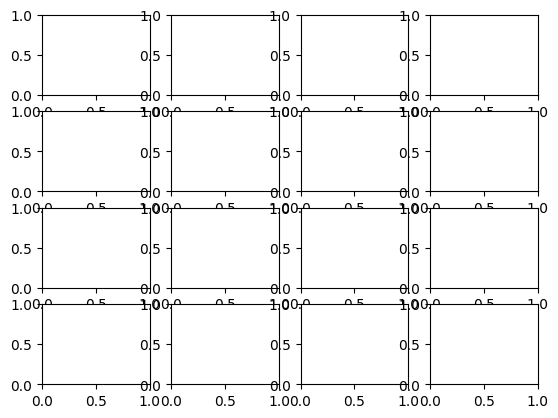

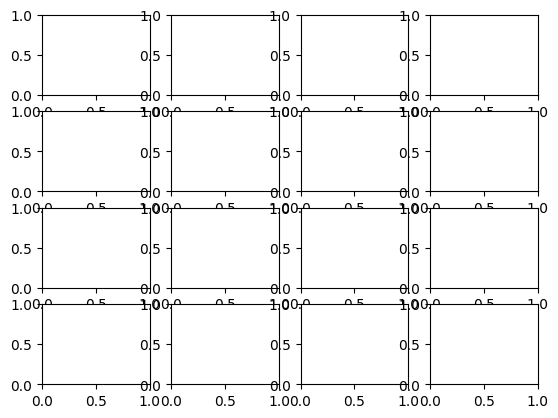

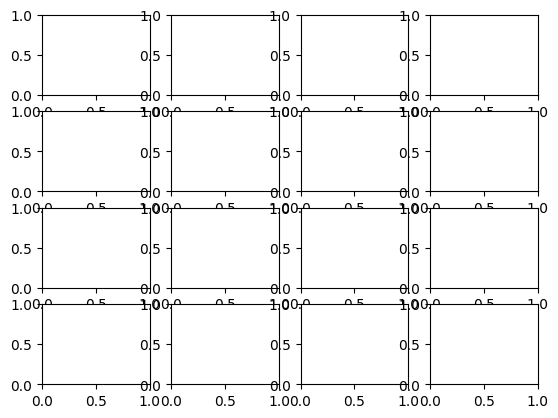

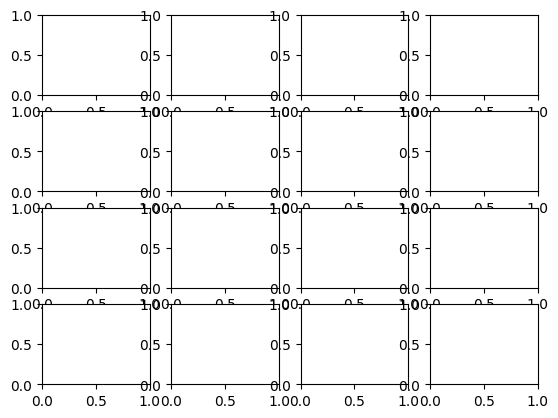

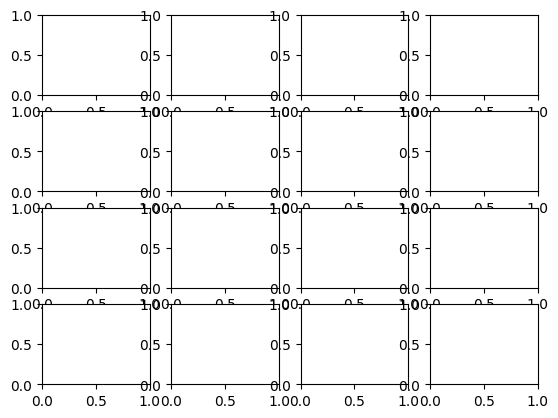

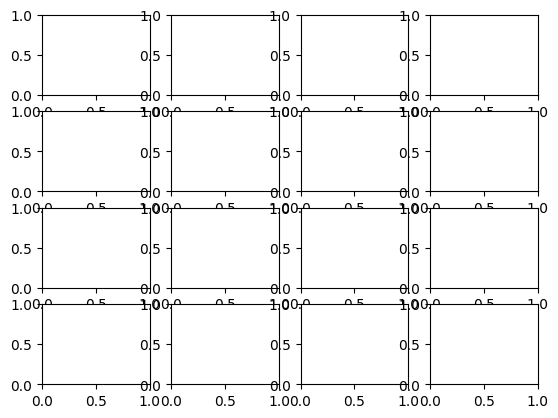

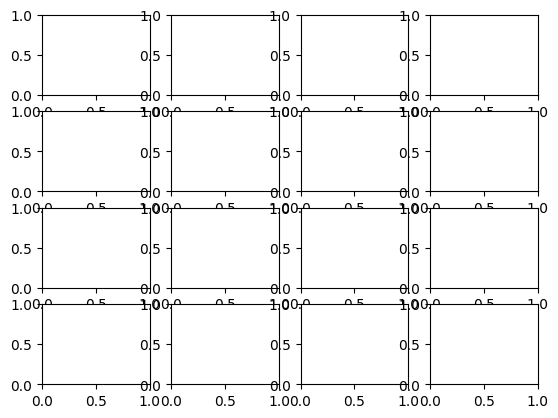

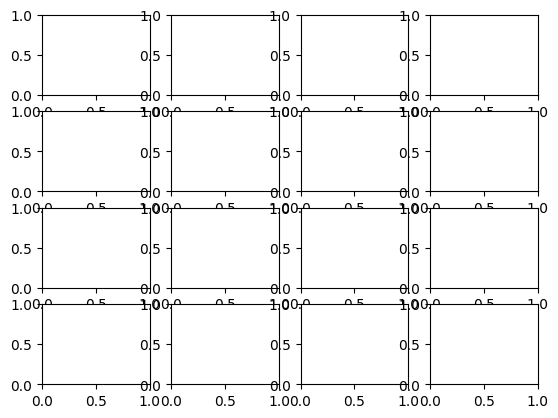

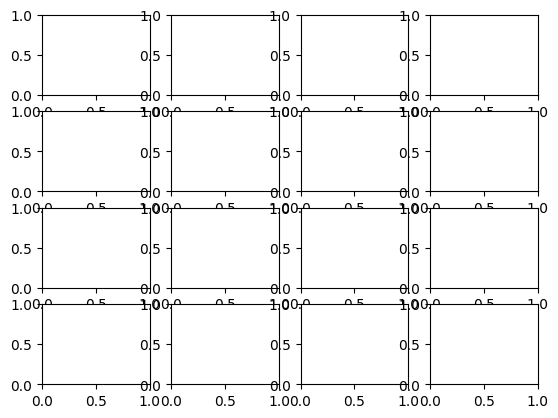

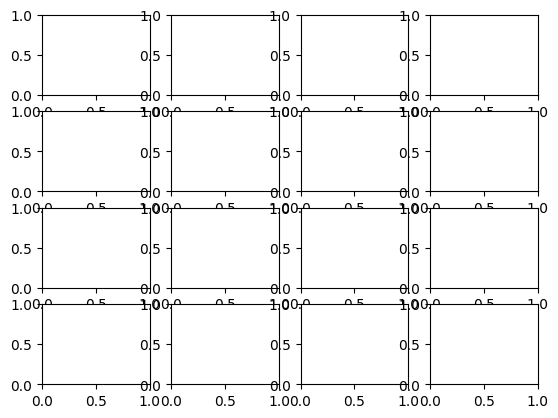

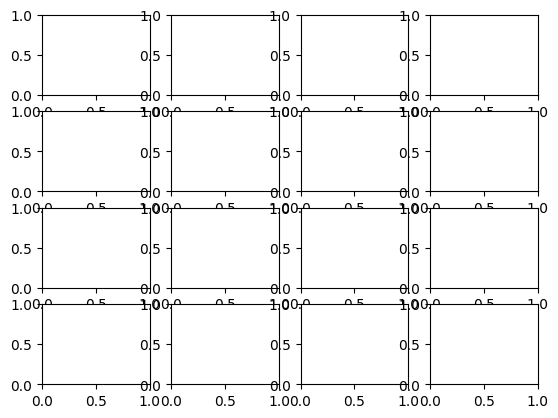

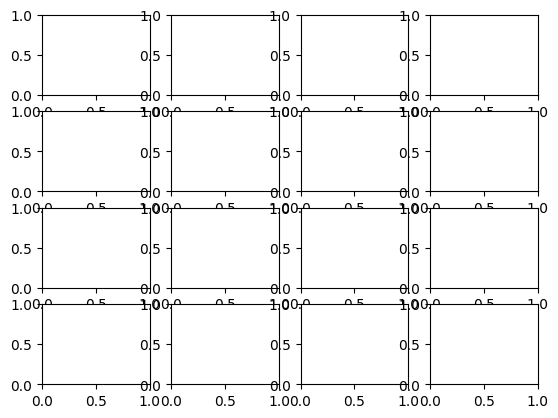

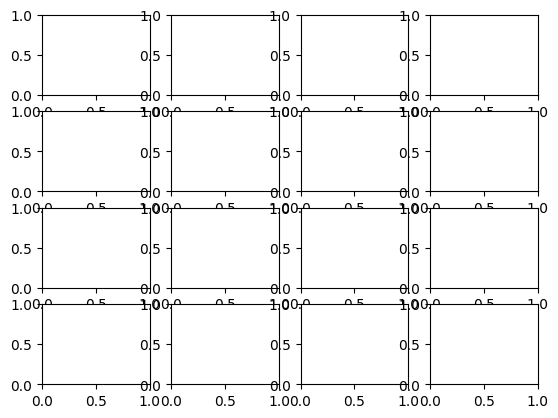

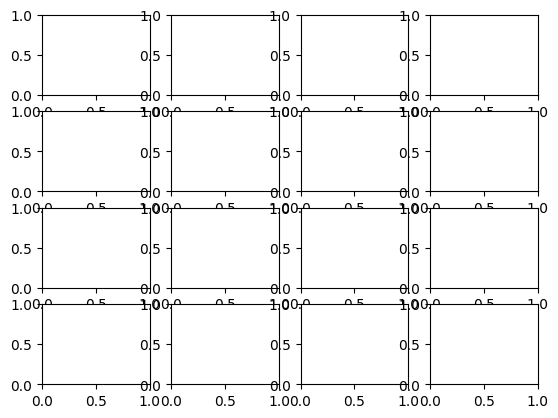

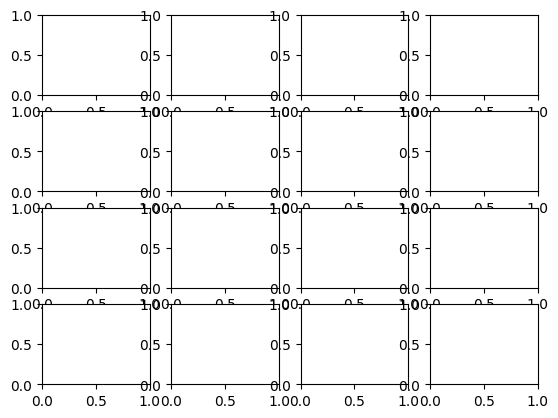

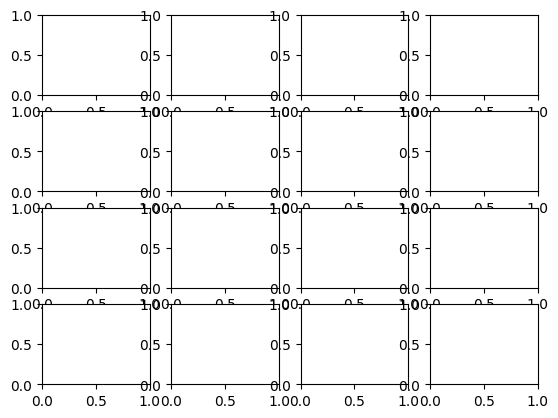

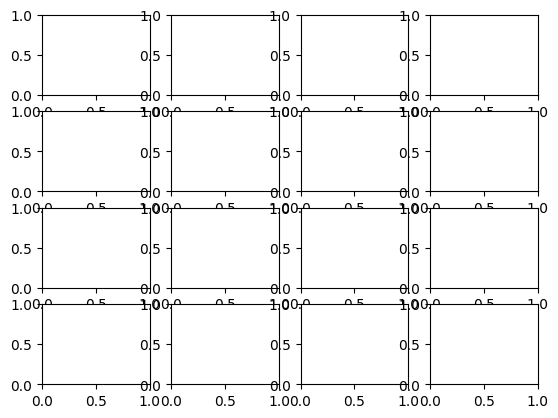

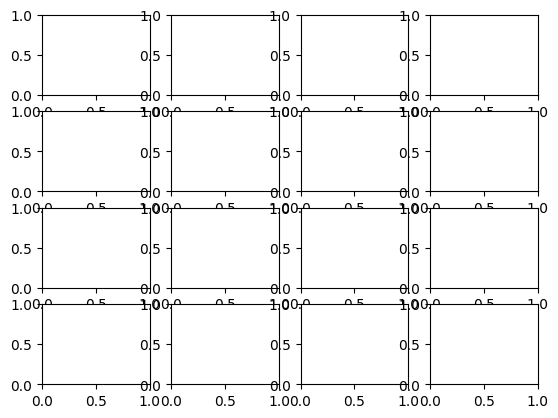

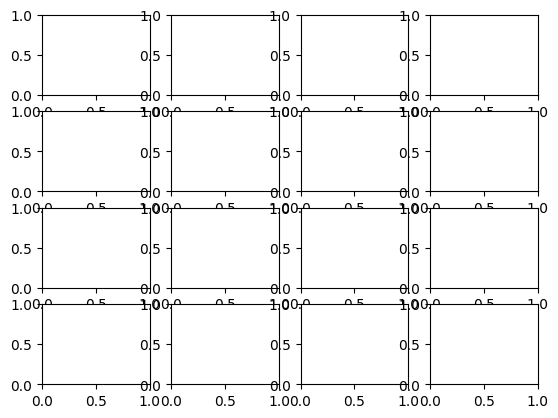

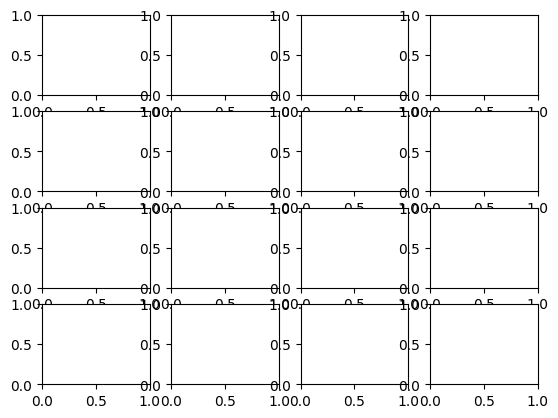

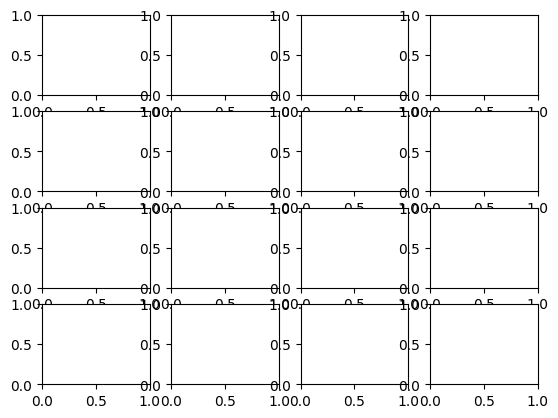

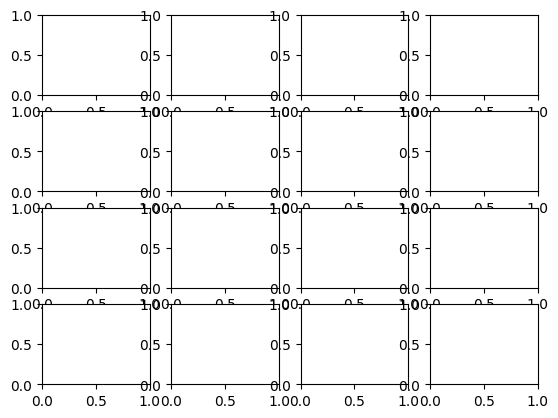

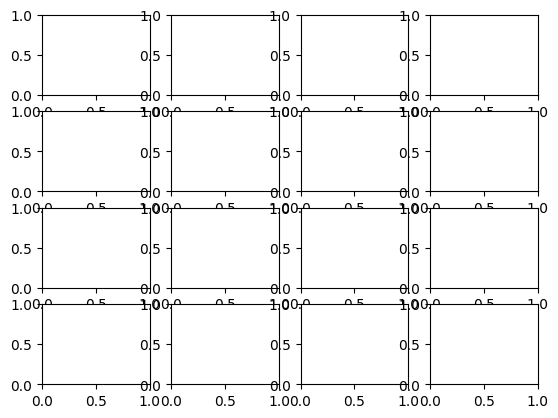

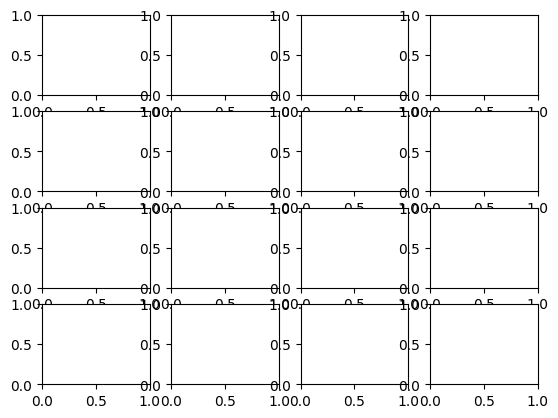

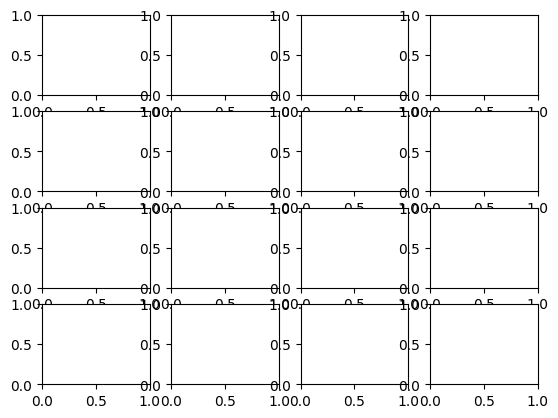

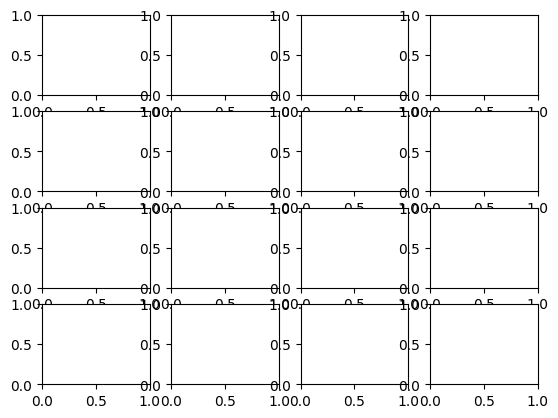

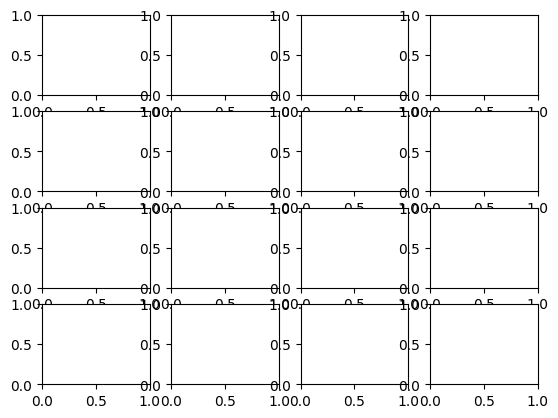

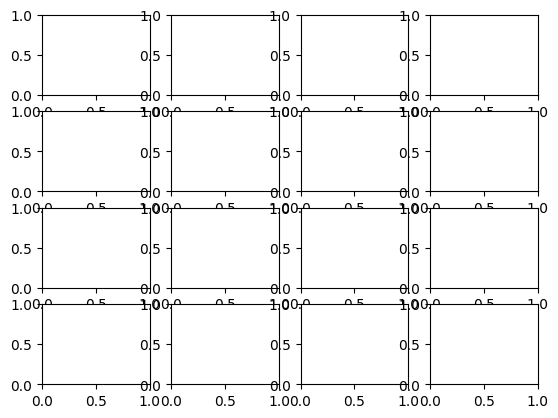

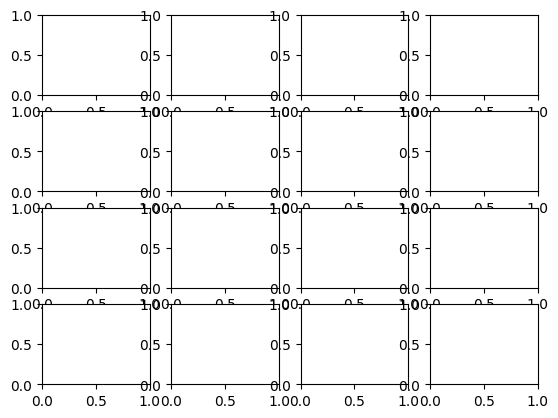

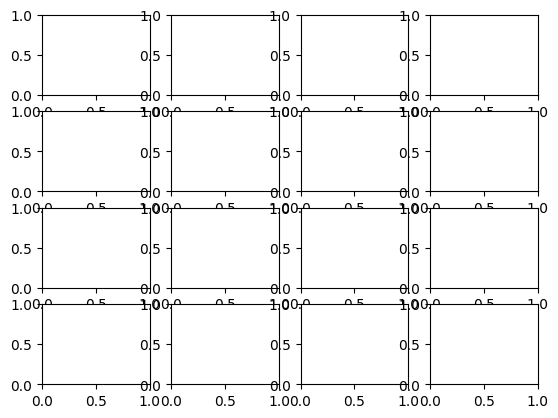

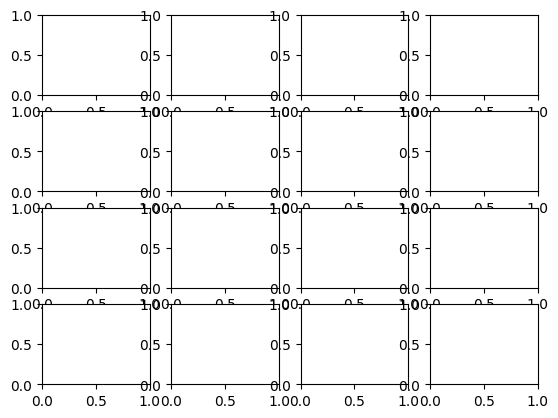

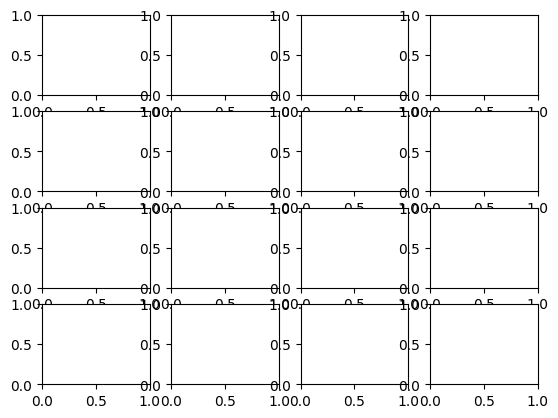

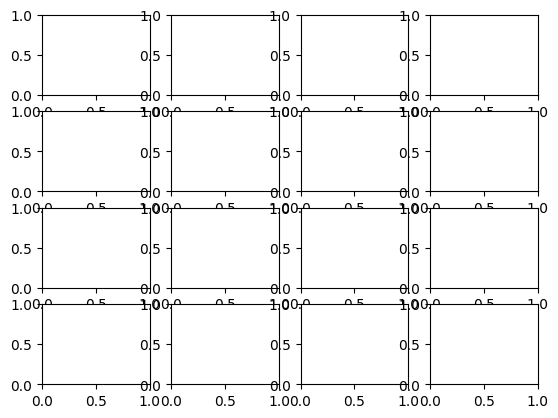

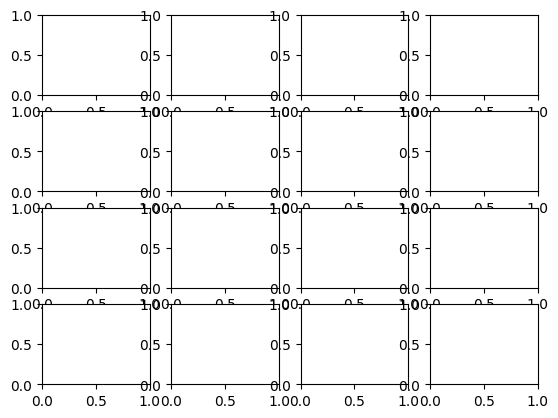

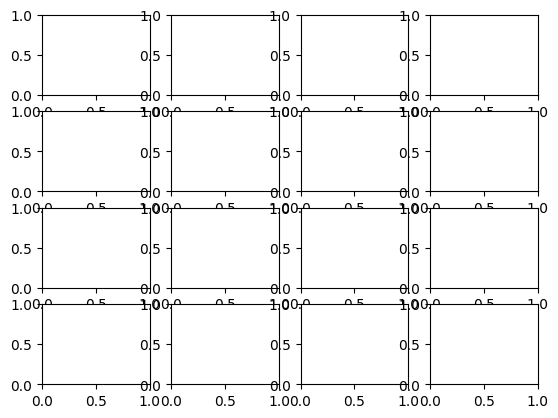

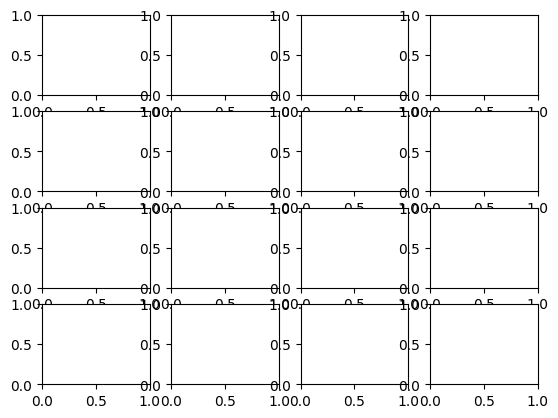

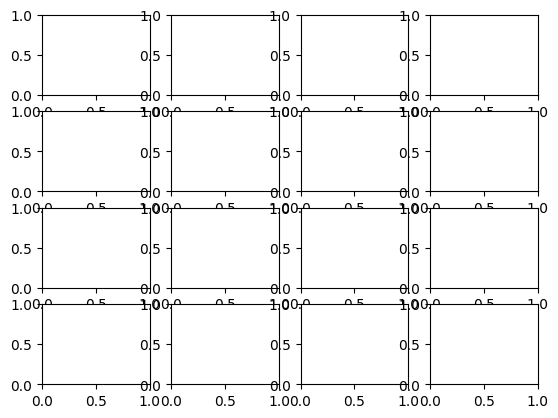

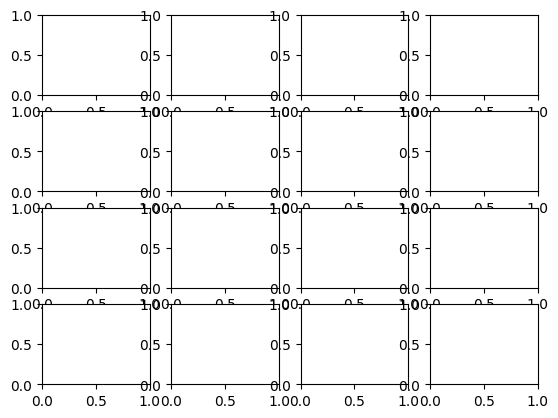

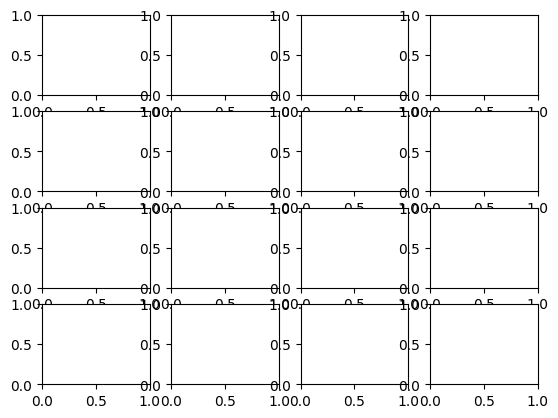

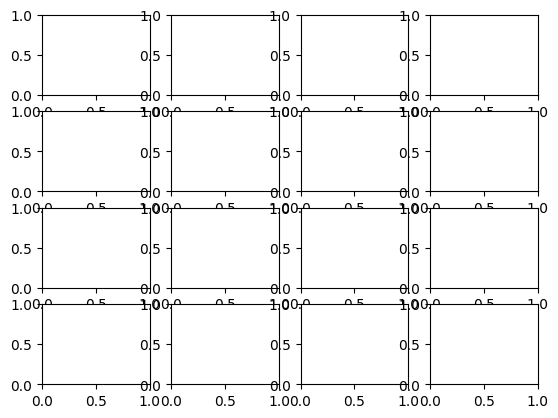

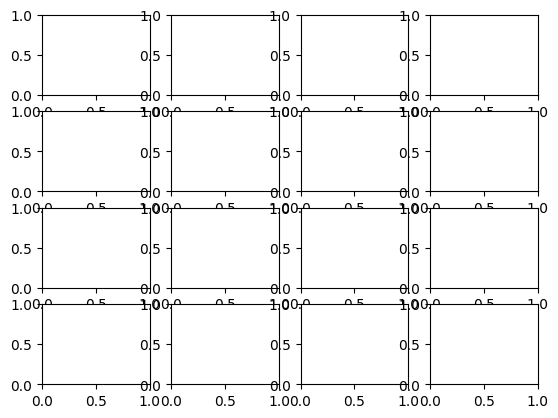

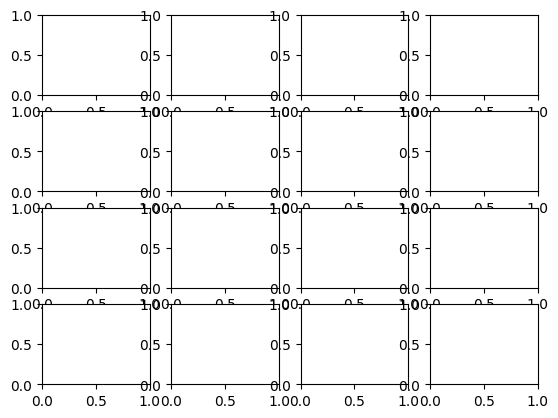

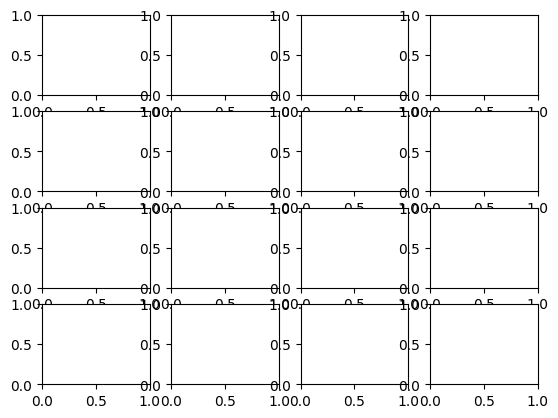

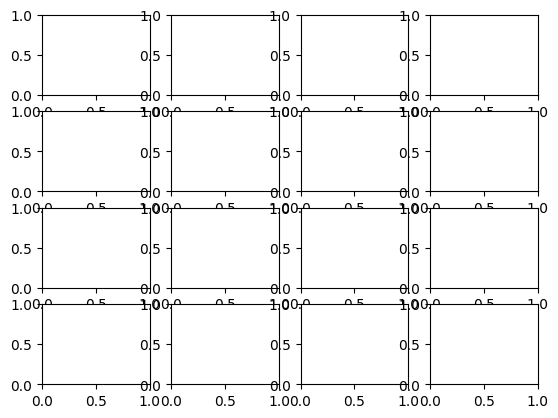

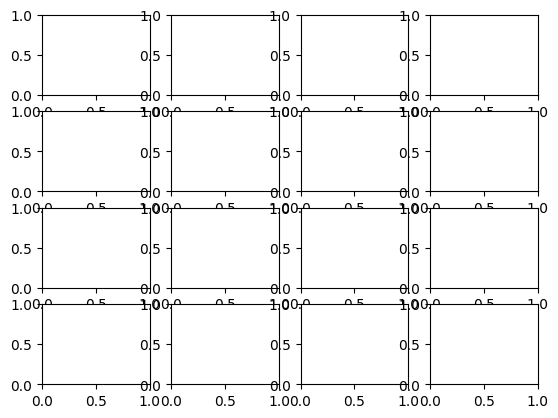

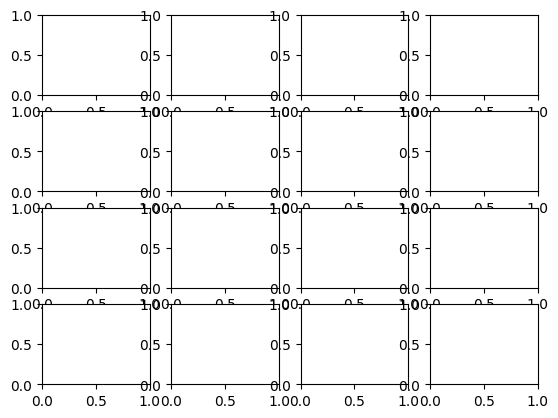

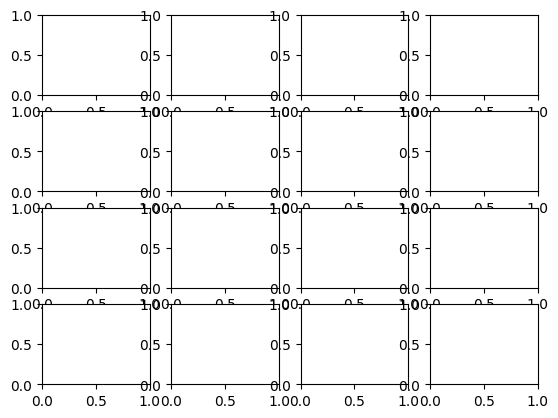

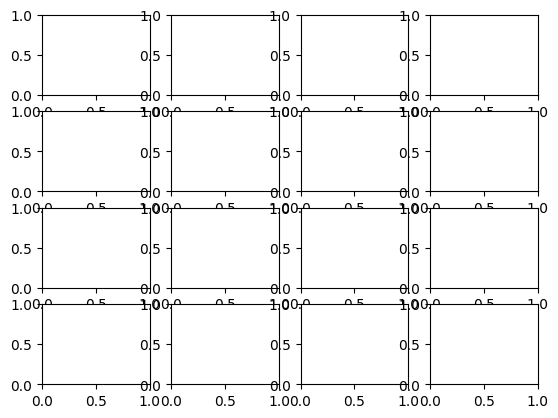

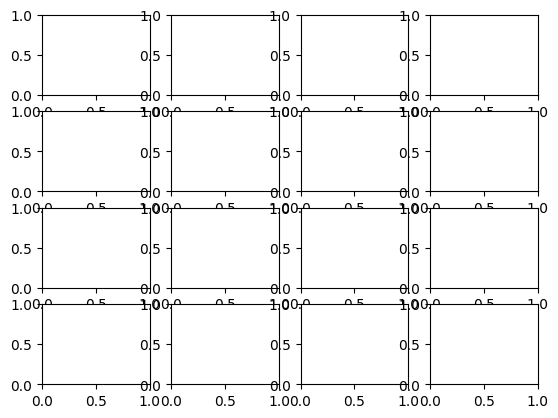

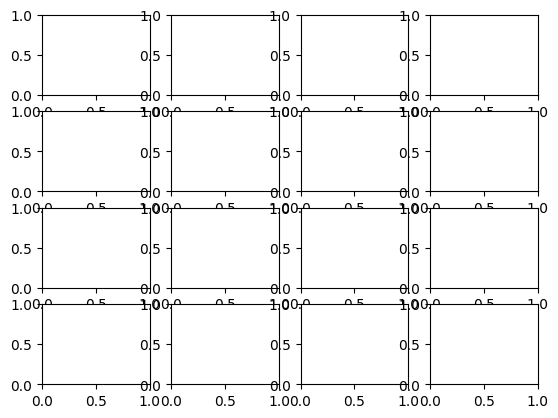

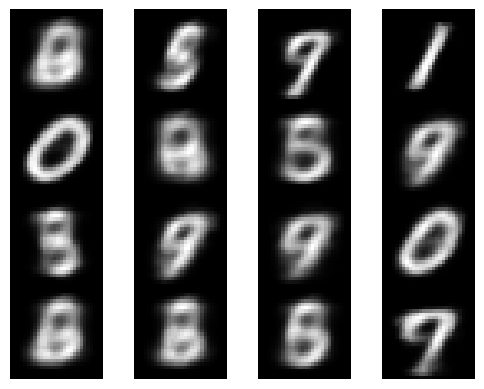

----------- EPOCH 60 -----------
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.2123


In [17]:
# Training and visualization loop
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((16, 28,28))
    display.clear_output(wait=True) # If you imported display fromIPython
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(model.predict(rand[i * 4 + j].reshape(1,28, 28))[0], cmap="gray")
        axs[i, j].axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
print("-----------", "EPOCH", epoch + 1,"-----------")
# Train the model
model.fit(x_train, x_train, epochs=1, verbose=1)